In [16]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

os.chdir('../')
from function import make_data

In [27]:
df_2 = make_data(0.01)

In [4]:
df = pd.read_csv('../pn500.csv')

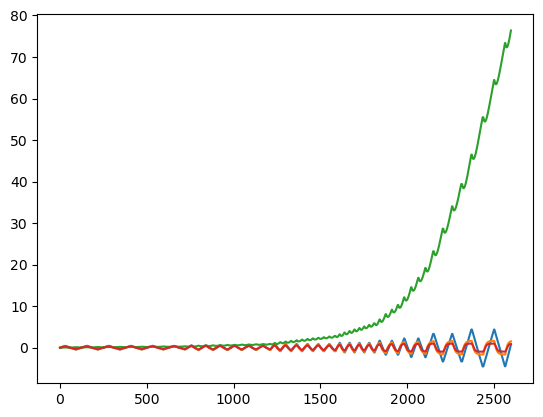

In [111]:
plt.plot(df['V1'])
plt.plot(df['V2'])
plt.plot(df['V3'])
plt.plot(df['V4'])

In [41]:
def bouc_wen(u, alpha, beta, gamma, n):
    z = np.zeros_like(u)
    for i in range(1, len(u)):
        dz = -beta * abs(u[i]) * abs(z[i-1])**(n-1) * z[i-1] - gamma * u[i] * abs(z[i-1])**n + alpha * u[i]
        z[i] = z[i-1] + dz
    return z

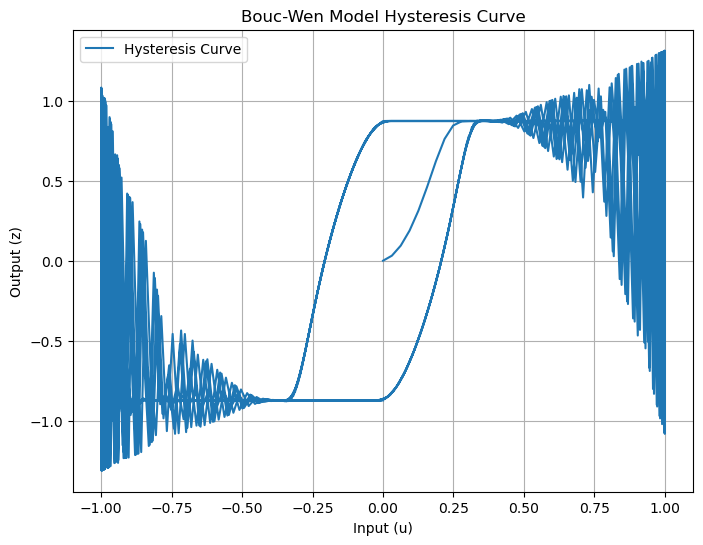

In [42]:
time = np.linspace(0, 10 * np.pi, 1000)
u = np.sin(time)

alpha = 1
beta = 1
gamma = 0.5
n = 3

z = bouc_wen(u, alpha, beta, gamma, n)

plt.figure(figsize=(8, 6))
plt.plot(u, z, label='Hysteresis Curve')
plt.title('Bouc-Wen Model Hysteresis Curve')
plt.xlabel('Input (u)')
plt.ylabel('Output (z)')
plt.grid(True)
plt.legend()
plt.show()


In [45]:
df_2

,u,time,f
0,0.000000e+00,0.00,0.000000
1,6.279052e-02,0.01,0.152729
2,1.253332e-01,0.02,0.272857
3,1.873813e-01,0.03,0.369560
4,2.486899e-01,0.04,0.449713
...,...,...,...
996,-2.486899e-01,9.96,0.299485
997,-1.873813e-01,9.97,0.338637
998,-1.253332e-01,9.98,0.375329
999,-6.279052e-02,9.99,0.410222


In [46]:
from scipy.optimize import minimize

# Define the Bouc-Wen model
def bouc_wen_model(t, u, params):
    alpha, beta, gamma, zeta = params
    
    n = len(u)
    z = np.zeros(n)
    f = np.zeros(n)
    
    for i in range(1, n):
        v = (u[i] - u[i-1]) / (t[i] - t[i-1])  # velocity
        z_dot = u[i] - alpha * z[i-1] - beta * z[i-1] * abs(u[i]) - gamma * z[i-1]**2 * u[i]
        z[i] = z[i-1] + z_dot * (t[i] - t[i-1])
        f[i] = zeta * z[i]
    
    return f

# Objective function to minimize
def objective(params, t, u, f_actual):
    f_pred = bouc_wen_model(t, u, params)
    error = np.sum((f_pred - f_actual)**2)
    return error

# Initial guess for parameters
initial_params = [1, 1, 1, 1]

# Minimize the objective function
result = minimize(objective, initial_params, args=(df_2['time'].values, df_2['u'].values, df_2['f'].values), method='Nelder-Mead')

# Extract optimized parameters
optimized_params = result.x

C:\Users\user\AppData\Local\Temp\ipykernel_2736\3843830616.py:13: RuntimeWarning: overflow encountered in double_scalars
  z_dot = u[i] - alpha * z[i-1] - beta * z[i-1] * abs(u[i]) - gamma * z[i-1]**2 * u[i]
C:\Users\user\AppData\Local\Temp\ipykernel_2736\3843830616.py:13: RuntimeWarning: invalid value encountered in double_scalars
  z_dot = u[i] - alpha * z[i-1] - beta * z[i-1] * abs(u[i]) - gamma * z[i-1]**2 * u[i]
C:\Users\user\AppData\Local\Temp\ipykernel_2736\3843830616.py:22: RuntimeWarning: overflow encountered in square
  error = np.sum((f_pred - f_actual)**2)


array([-45.93857163, 117.18149753,  63.07236099,  -1.14981999])

In [47]:
optimized_params

array([-45.93857163, 117.18149753,  63.07236099,  -1.14981999])

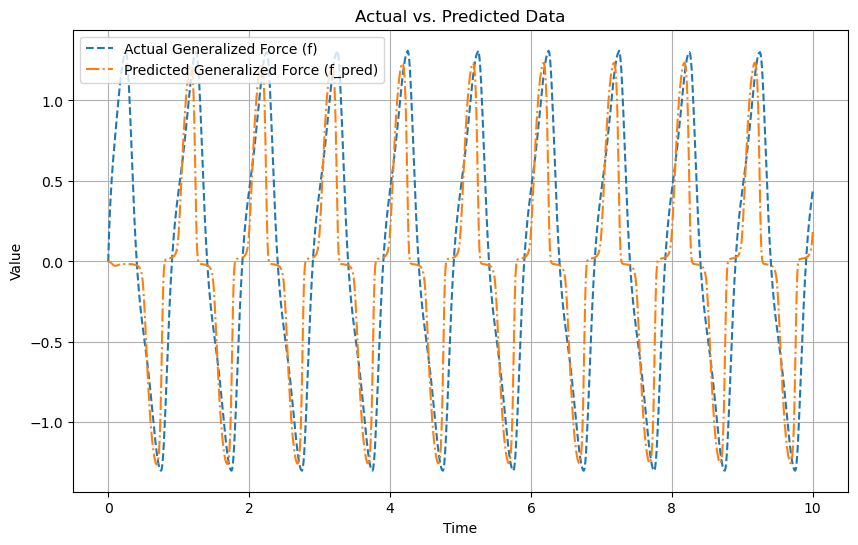

In [50]:
# Compute the model output using optimized parameters
f_pred = bouc_wen_model(df_2['time'].values, df_2['u'].values, optimized_params)

# Plotting the actual vs predicted data
plt.figure(figsize=(10, 6))
plt.plot(df_2['time'], df_2['f'], label="Actual Generalized Force (f)", linestyle="--")
plt.plot(df_2['time'], f_pred, label="Predicted Generalized Force (f_pred)", linestyle="-.")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.title("Actual vs. Predicted Data")
plt.grid(True)
plt.show()


In [51]:
def bouc_wen_model_2(t, u, params):
    alpha, beta, gamma, zeta = params
    
    n = len(u)
    z = np.zeros(n)
    f = np.zeros(n)
    
    for i in range(1, n):
        v = (u[i] - u[i-1]) / (t[i] - t[i-1])  # velocity
        z_dot = u[i] - alpha * z[i-1] - beta * z[i-1] * abs(u[i]) - gamma * z[i-1]**2 * u[i]
        z[i] = z[i-1] + z_dot * (t[i] - t[i-1])
        f[i] = zeta * z[i]
    
    return f

In [53]:
result_2 = minimize(objective, initial_params, args=(df_2['time'].values, df_2['u'].values, df_2['f'].values), method='Nelder-Mead', tol=1e-6)

# Extract optimized parameters for the second model
optimized_params_2 = result_2.x
optimized_params_2

C:\Users\user\AppData\Local\Temp\ipykernel_2736\3843830616.py:13: RuntimeWarning: overflow encountered in double_scalars
  z_dot = u[i] - alpha * z[i-1] - beta * z[i-1] * abs(u[i]) - gamma * z[i-1]**2 * u[i]
C:\Users\user\AppData\Local\Temp\ipykernel_2736\3843830616.py:13: RuntimeWarning: invalid value encountered in double_scalars
  z_dot = u[i] - alpha * z[i-1] - beta * z[i-1] * abs(u[i]) - gamma * z[i-1]**2 * u[i]
C:\Users\user\AppData\Local\Temp\ipykernel_2736\3843830616.py:22: RuntimeWarning: overflow encountered in square
  error = np.sum((f_pred - f_actual)**2)


array([-45.93857163, 117.18149753,  63.07236099,  -1.14981999])

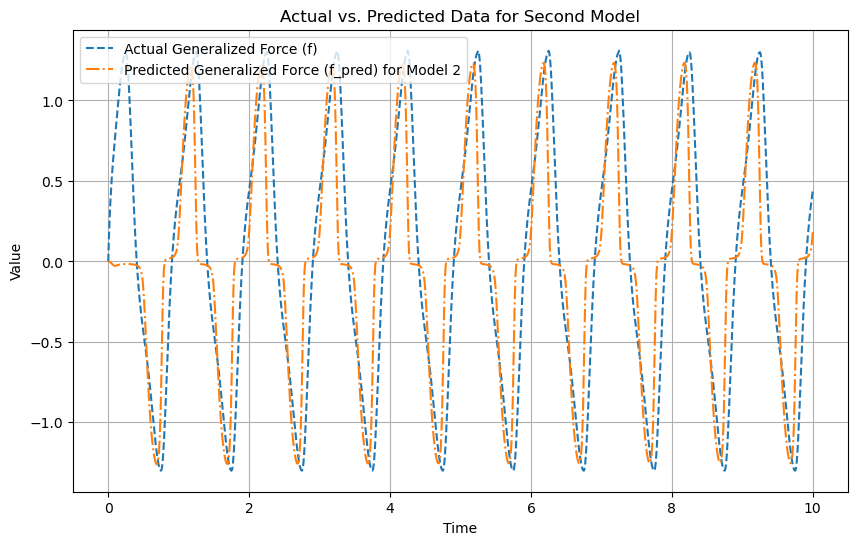

In [54]:
f_pred_2 = bouc_wen_model_2(df_2['time'].values, df_2['u'].values, optimized_params_2)

# Plotting the actual vs predicted data for the second model
plt.figure(figsize=(10, 6))
plt.plot(df_2['time'], df_2['f'], label="Actual Generalized Force (f)", linestyle="--")
plt.plot(df_2['time'], f_pred_2, label="Predicted Generalized Force (f_pred) for Model 2", linestyle="-.")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.title("Actual vs. Predicted Data for Second Model")
plt.grid(True)
plt.show()

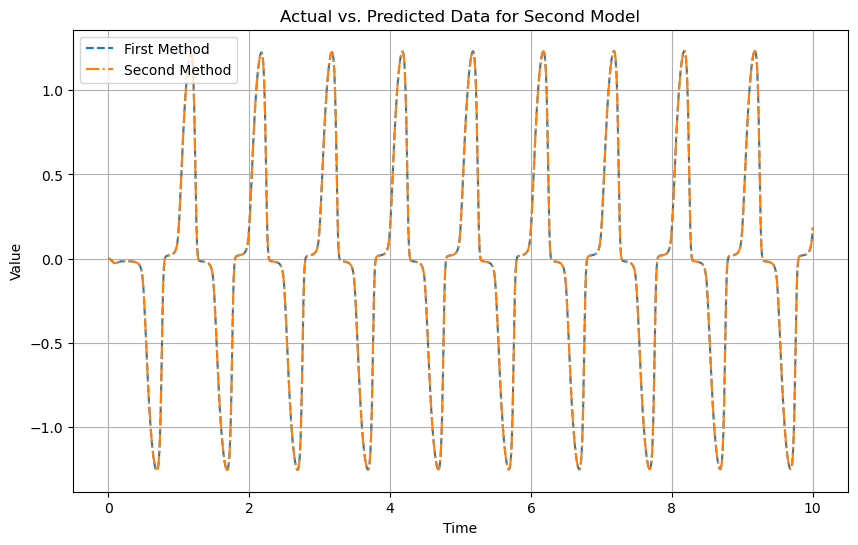

In [55]:
f_pred_2 = bouc_wen_model_2(df_2['time'].values, df_2['u'].values, optimized_params_2)

# Plotting the actual vs predicted data for the second model
plt.figure(figsize=(10, 6))
plt.plot(df_2['time'], f_pred, label="First Method", linestyle="--")
plt.plot(df_2['time'], f_pred_2, label="Second Method", linestyle="-.")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.title("Actual vs. Predicted Data for Second Model")
plt.grid(True)
plt.show()

In [76]:
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow_probability as tfp

In [143]:
class BoucWenODE(tf.keras.Model):
    def __init__(self, net, alpha, beta, gamma):
        super(BoucWenODE, self).__init__()
        self.net = net
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        
    def __call__(self, t, states):
        u_val = self.net(tf.reshape(t, [1, 1]))
        u_val = tf.squeeze(u_val)  # Ensure u_val is a scalar
        z = states[0]
        
        zdot = u_val - self.alpha * z - self.beta * z * tf.abs(u_val) - self.gamma * z**2 * u_val
        return zdot

In [137]:
class ODE_NN(tf.keras.Model):
    def __init__(self, output_dim=1):
        super(ODE_NN, self).__init__()
        self.dense1 = layers.Dense(32, activation='relu')
        self.dense2 = layers.Dense(32, activation='relu')
        self.dense3 = layers.Dense(output_dim, activation='linear')
        
    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        return self.dense3(x)

In [162]:
time_values = tf.convert_to_tensor(df_2['time'].values, dtype=tf.float32)
u_values = tf.convert_to_tensor(df_2['u'].values, dtype=tf.float32)
f_values = tf.convert_to_tensor(df_2['f'].values, dtype=tf.float32)

In [163]:
u_values = tf.reshape(u_values, [1, -1])
f_values = tf.reshape(f_values, [1, -1])

In [139]:
initial_time = tf.constant([0.0], dtype=tf.float32)

In [144]:
alpha, beta, gamma = optimized_params_2[:3]

In [145]:
model = ODE_NN()
bouc_wen_ode = BoucWenODE(model, alpha, beta, gamma)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

In [146]:
solver = tfp.math.ode.DormandPrince()

In [ ]:
solver.solve(bouc_wen_ode, initial_time, initial_state, solution_times=time_values)

In [ ]:
epochs = 1000
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        # 주어진 파라미터로 ODE 풀기
        predicted_f = solver.solve(bouc_wen_ode, initial_time, initial_state, solution_times=time_values)
        predicted_f = tf.squeeze(predicted_f)
        
        # 손실 계산 (예측된 값과 실제 값 사이의 MSE)
        loss = tf.reduce_mean(tf.square(predicted_f - f_values))
    
    # 그래디언트 계산 및 적용
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    
    if epoch % 100 == 0:
        print(f"Epoch: {epoch}, Loss: {loss.numpy()}")